In [1]:
#Model 1
#Predicting session length for current time given the user profile and session length of prior time step 

#Aletrnatives:
# - Predicting session length for next login given user profile and session length of prior time step
# - Predicting session length for next login given expected user profile at next login

In [2]:
import numpy as np

from pandas import read_csv
from pandas import DataFrame
from pandas import concat


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
import tensorflow as tf

from matplotlib import pyplot

from math import sqrt
from numpy import concatenate
import time
import util


Using TensorFlow backend.


In [3]:
def train(epochs):
    train_X, train_y  = util.get_data('/home/ubuntu/data/summary/train/*.csv')
    print('TRAIN:: ',train_X.shape,train_y.shape)


    validate_X, validate_y  = util.get_data('/home/ubuntu/data/summary/validate/*.csv')
    print('VALIDATE:: ',validate_X.shape,validate_y.shape)    
    
    
    # design network
    model = util.get_model_1(train_X)
    # fit network
    history = model.fit(train_X, train_y, 
                        epochs=epochs, 
                        batch_size=300, 
                        validation_data=(validate_X, validate_y), 
                        verbose=2, 
                        shuffle=False)
    # plot history
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()    
    return model



def test(model):
    test_X, test_y  = util.get_data('/home/ubuntu/data/summary/test/*.csv')
    print('TEST:: ',test_X.shape,test_y.shape)    
    
    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = inv_yhat[:,0]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = inv_y[:,0]

    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)
    
    mae = mean_absolute_error(inv_y, inv_yhat)
    print('Test MAE: %.3f' % mae)
    
    norm = mae/test_X.shape[0]
    print('Test Normalized MAE: %.3f' % norm)
    
    pyplot.figure()
    pyplot.plot(inv_y, label='actual')
    pyplot.plot(inv_yhat, label='pred')
    pyplot.legend()
    pyplot.show()    

TRAIN::  (695872, 1, 7) (695872,)
VALIDATE::  (22457, 1, 7) (22457,)
Train on 695872 samples, validate on 22457 samples
Epoch 1/500
 - 12s - loss: 5755.2916 - val_loss: 4826.4292
Epoch 2/500
 - 11s - loss: 5711.2479 - val_loss: 4782.7876
Epoch 3/500
 - 11s - loss: 5667.4897 - val_loss: 4739.5900
Epoch 4/500
 - 11s - loss: 5624.3143 - val_loss: 4697.4624
Epoch 5/500
 - 11s - loss: 5582.6654 - val_loss: 4657.8633
Epoch 6/500
 - 11s - loss: 5543.4795 - val_loss: 4620.8950
Epoch 7/500
 - 11s - loss: 5506.2030 - val_loss: 4585.5035
Epoch 8/500
 - 11s - loss: 5470.1324 - val_loss: 4551.1730
Epoch 9/500
 - 11s - loss: 5435.0681 - val_loss: 4517.8829
Epoch 10/500
 - 11s - loss: 5401.0567 - val_loss: 4485.6869
Epoch 11/500
 - 11s - loss: 5368.1655 - val_loss: 4454.6886
Epoch 12/500
 - 11s - loss: 5336.3467 - val_loss: 4424.8244
Epoch 13/500
 - 11s - loss: 5305.5003 - val_loss: 4395.9863
Epoch 14/500
 - 11s - loss: 5275.5463 - val_loss: 4368.1776
Epoch 15/500
 - 11s - loss: 5246.4878 - val_loss:

 - 11s - loss: 4592.6677 - val_loss: 3870.1999
Epoch 136/500
 - 11s - loss: 4592.6403 - val_loss: 3870.3250
Epoch 137/500
 - 11s - loss: 4592.6139 - val_loss: 3870.4459
Epoch 138/500
 - 11s - loss: 4592.5888 - val_loss: 3870.5624
Epoch 139/500
 - 11s - loss: 4592.5646 - val_loss: 3870.6753
Epoch 140/500
 - 11s - loss: 4592.5414 - val_loss: 3870.7843
Epoch 141/500
 - 11s - loss: 4592.5191 - val_loss: 3870.8886
Epoch 142/500
 - 11s - loss: 4592.4978 - val_loss: 3870.9885
Epoch 143/500
 - 11s - loss: 4592.4772 - val_loss: 3871.0856
Epoch 144/500
 - 11s - loss: 4592.4573 - val_loss: 3871.1795
Epoch 145/500
 - 11s - loss: 4592.4380 - val_loss: 3871.2701
Epoch 146/500
 - 11s - loss: 4592.4193 - val_loss: 3871.3570
Epoch 147/500
 - 11s - loss: 4592.4012 - val_loss: 3871.4406
Epoch 148/500
 - 11s - loss: 4592.3836 - val_loss: 3871.5208
Epoch 149/500
 - 11s - loss: 4592.3665 - val_loss: 3871.5983
Epoch 150/500
 - 11s - loss: 4592.3499 - val_loss: 3871.6730
Epoch 151/500
 - 11s - loss: 4592.3336

Epoch 270/500
 - 11s - loss: 4591.1786 - val_loss: 3872.5821
Epoch 271/500
 - 11s - loss: 4591.1707 - val_loss: 3872.5700
Epoch 272/500
 - 11s - loss: 4591.1628 - val_loss: 3872.5577
Epoch 273/500
 - 11s - loss: 4591.1550 - val_loss: 3872.5454
Epoch 274/500
 - 11s - loss: 4591.1471 - val_loss: 3872.5330
Epoch 275/500
 - 11s - loss: 4591.1393 - val_loss: 3872.5208
Epoch 276/500
 - 11s - loss: 4591.1315 - val_loss: 3872.5084
Epoch 277/500
 - 11s - loss: 4591.1237 - val_loss: 3872.4961
Epoch 278/500
 - 11s - loss: 4591.1159 - val_loss: 3872.4837
Epoch 279/500
 - 11s - loss: 4591.1082 - val_loss: 3872.4713
Epoch 280/500
 - 11s - loss: 4591.1004 - val_loss: 3872.4590
Epoch 281/500
 - 11s - loss: 4591.0927 - val_loss: 3872.4466
Epoch 282/500
 - 11s - loss: 4591.0850 - val_loss: 3872.4342
Epoch 283/500
 - 11s - loss: 4591.0773 - val_loss: 3872.4218
Epoch 284/500
 - 11s - loss: 4591.0696 - val_loss: 3872.4093
Epoch 285/500
 - 11s - loss: 4591.0620 - val_loss: 3872.3967
Epoch 286/500
 - 11s - l

Epoch 405/500
 - 11s - loss: 4590.2670 - val_loss: 3870.8406
Epoch 406/500
 - 11s - loss: 4590.2613 - val_loss: 3870.8282
Epoch 407/500
 - 11s - loss: 4590.2557 - val_loss: 3870.8158
Epoch 408/500
 - 11s - loss: 4590.2500 - val_loss: 3870.8035
Epoch 409/500
 - 11s - loss: 4590.2444 - val_loss: 3870.7911
Epoch 410/500
 - 11s - loss: 4590.2388 - val_loss: 3870.7789
Epoch 411/500
 - 11s - loss: 4590.2332 - val_loss: 3870.7665
Epoch 412/500
 - 11s - loss: 4590.2276 - val_loss: 3870.7541
Epoch 413/500
 - 11s - loss: 4590.2220 - val_loss: 3870.7418
Epoch 414/500
 - 11s - loss: 4590.2165 - val_loss: 3870.7295
Epoch 415/500
 - 11s - loss: 4590.2110 - val_loss: 3870.7173
Epoch 416/500
 - 11s - loss: 4590.2055 - val_loss: 3870.7052
Epoch 417/500
 - 11s - loss: 4590.2000 - val_loss: 3870.6930
Epoch 418/500
 - 11s - loss: 4590.1945 - val_loss: 3870.6810
Epoch 419/500
 - 11s - loss: 4590.1890 - val_loss: 3870.6688
Epoch 420/500
 - 11s - loss: 4590.1836 - val_loss: 3870.6566
Epoch 421/500
 - 11s - l

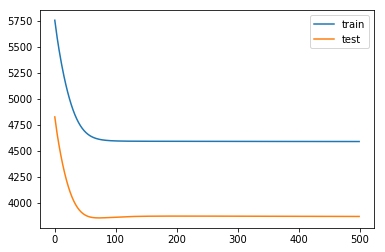

In [4]:
model = train(500)

TEST::  (35967, 1, 7) (35967,)
Test RMSE: 11622.203
Test MAE: 4630.576
Test Normalized MAE: 0.129


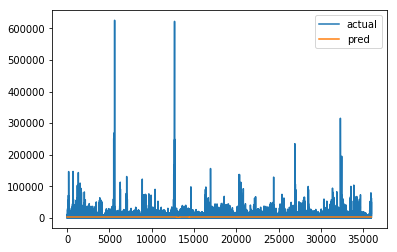

In [5]:
test(model)